In [5]:
import pandas as pd

bike_df = pd.read_csv('data/bike_train.csv')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간, 요일 추출
bike_df['year'] = bike_df.datetime.dt.year
bike_df['month'] = bike_df.datetime.dt.month
bike_df['day'] = bike_df.datetime.dt.day
bike_df['hour'] = bike_df.datetime.dt.hour
bike_df['dayofweek'] = bike_df.datetime.dt.dayofweek

bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


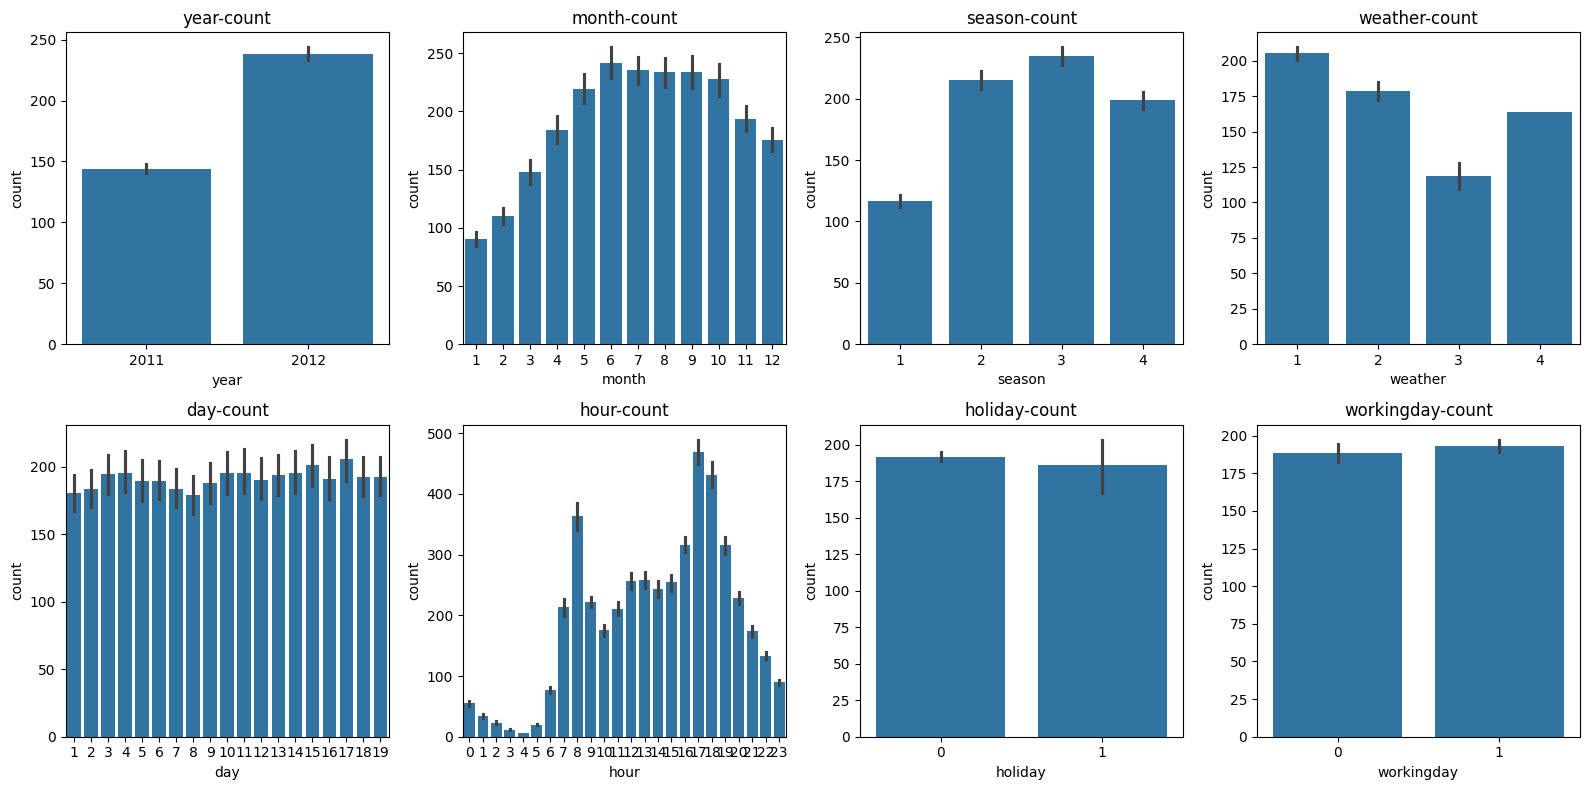

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필요없는 컬럼 삭제하기
drop_columns = ['datetime','casual','registered']
bike_df = bike_df.drop(columns=drop_columns, axis=1)

# 막대그래프로 시각화
plt.figure(figsize=(16, 8))
features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.barplot(x=feature, y='count', data=bike_df)
    plt.title(feature+'-count')

plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = bike_df.drop(['count','temp','day'], axis=1)
y = bike_df['count']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 생성 및 훈련 (LinearRegression)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)

print(f'MSE : {mean_squared_error(y_test, pred):.2f}')
print(f'R2 Score : {r2_score(y_test, pred):.2f}')

print(f'train : {lr_model.score(X_train, y_train):.2f}')
print(f'test : {lr_model.score(X_test, y_test):.2f}')

MSE : 20109.88
R2 Score : 0.39
train : 0.39
test : 0.39


In [9]:
# 모델 생성 및 훈련 (KNeighborsRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

print(f'MSE : {mean_squared_error(y_test, pred):.2f}')
print(f'R2 Score : {r2_score(y_test, pred):.2f}')

print(f'train : {knn_model.score(X_train, y_train):.2f}')
print(f'test : {knn_model.score(X_test, y_test):.2f}')

MSE : 13032.37
R2 Score : 0.60
train : 0.73
test : 0.60


In [10]:
# 모델 생성 및 훈련 (DecisionTreeRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
pred = dt_model.predict(X_test)

print(f'MSE : {mean_squared_error(y_test, pred):.2f}')
print(f'R2 Score : {r2_score(y_test, pred):.2f}')

print(f'train : {dt_model.score(X_train, y_train):.2f}')
print(f'test : {dt_model.score(X_test, y_test):.2f}')

MSE : 3097.94
R2 Score : 0.91
train : 1.00
test : 0.91


In [11]:
# 모델 생성 및 훈련 (RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

print(f'MSE : {mean_squared_error(y_test, pred):.2f}')
print(f'R2 Score : {r2_score(y_test, pred):.2f}')

print(f'train : {rf_model.score(X_train, y_train):.2f}')
print(f'test : {rf_model.score(X_test, y_test):.2f}')

MSE : 1467.03
R2 Score : 0.96
train : 0.99
test : 0.96


In [12]:
# 수치형변수 스케일링
from sklearn.preprocessing import StandardScaler

numerical_features = ['atemp','humidity','windspeed']

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [13]:
# 범주형변수 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['season','weather','year','month','hour','dayofweek']

# handle_unknown : 학습 시 보지 못한 범주 처리 방식
# sparse_output : 희소 행렬로 반환할지 여부
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_ohe = ohe.fit_transform(X_train[categorical_features])
X_test_ohe = ohe.transform(X_test[categorical_features])

ohe_column = ohe.get_feature_names_out(categorical_features)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_column, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_column, index=X_test.index)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 기존 데이터프레임과 원핫인코딩 된 데이터프레임 합치기
X_train_preprocessed = pd.concat([X_train[numerical_features], X_train_ohe], axis=1)
X_test_preprocessed = pd.concat([X_test[numerical_features], X_test_ohe], axis=1)

# 최종 훈련 테스트 데이터 만들어서 모델 생성 및 훈련
lr_model2 = LinearRegression()
lr_model2.fit(X_train_preprocessed, y_train)
pred = lr_model2.predict(X_test_preprocessed)

print(f'MSE : {mean_squared_error(y_test, pred):.2f}')
print(f'R2 Score : {r2_score(y_test, pred):.2f}')

print(f'train : {lr_model2.score(X_train_preprocessed, y_train):.2f}')
print(f'test : {lr_model2.score(X_test_preprocessed, y_test):.2f}')

MSE : 10117.54
R2 Score : 0.69
train : 0.69
test : 0.69
